In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('cleaneddata.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data['department'] = LabelEncoder().fit_transform(data['department'])

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.000000,0,1,0,7,low
1,0.80,0.86,5,262.000000,6.000000,0,1,0,7,medium
2,0.11,0.88,7,272.000000,4.000000,0,1,0,7,medium
3,0.72,0.87,5,223.000000,5.000000,0,1,0,7,low
4,0.37,0.52,2,200.511732,3.380048,0,1,0,7,low


In [11]:
data['salary'] = LabelEncoder().fit_transform(data['salary'])

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.000000,0,1,0,7,1
1,0.80,0.86,5,262.000000,6.000000,0,1,0,7,2
2,0.11,0.88,7,272.000000,4.000000,0,1,0,7,2
3,0.72,0.87,5,223.000000,5.000000,0,1,0,7,1
4,0.37,0.52,2,200.511732,3.380048,0,1,0,7,1


In [15]:
column_mapping = {col: idx for idx, col in enumerate(list(data.columns))}

In [17]:
column_mapping

{'satisfaction_level': 0,
 'last_evaluation': 1,
 'number_project': 2,
 'average_montly_hours': 3,
 'time_spend_company': 4,
 'work_accident': 5,
 'left': 6,
 'promotion_last_5years': 7,
 'department': 8,
 'salary': 9}

In [19]:
data.columns = [column_mapping[col] for col in data.columns]

In [21]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.38,0.53,2,157.000000,3.000000,0,1,0,7,1
1,0.80,0.86,5,262.000000,6.000000,0,1,0,7,2
2,0.11,0.88,7,272.000000,4.000000,0,1,0,7,2
3,0.72,0.87,5,223.000000,5.000000,0,1,0,7,1
4,0.37,0.52,2,200.511732,3.380048,0,1,0,7,1


In [23]:
X = data.drop(columns=[6])
y = data[6]

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [27]:
def draw_confusion_matrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    cm_display.plot()
    plt.show()

In [29]:
X_train_85, X_test_15, y_train_85, y_test_15 = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_65, X_test_35, y_train_65, y_test_35 = train_test_split(X, y, test_size=0.35, random_state=42)

In [31]:
def shuffle_data(X, y):
    indices = np.random.permutation(len(y))  # Xáo trộn chỉ số
    if isinstance(X, np.ndarray):
        return X[indices], y[indices]
    else:
        return X.iloc[indices].to_numpy(), y.iloc[indices].to_numpy()

In [33]:
def evaluate_model(X_train, y_train):
    X_train, y_train = shuffle_data(X_train, y_train)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = SGDClassifier(random_state=42)
    
    y_pred = cross_val_predict(clf, X_train, y_train, cv=skf)
    
    cm = confusion_matrix(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    draw_confusion_matrix(y_train, y_pred)

Results for Train/Test Split 85/15:
Precision: 0.3979
Recall: 0.0421
F1 Score: 0.0762
Confusion Matrix:


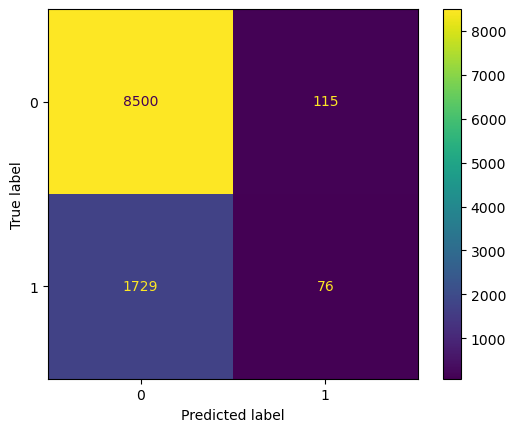

In [35]:
print("Results for Train/Test Split 85/15:")
evaluate_model(X_train_85, y_train_85)


Results for Train/Test Split 75/25:
Precision: 0.9975
Recall: 1.0000
F1 Score: 0.9987
Confusion Matrix:


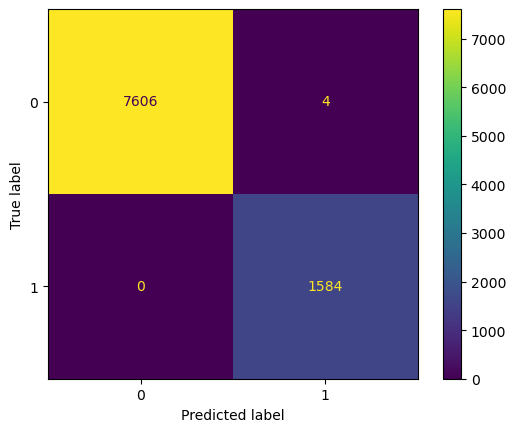

In [132]:
print("\nResults for Train/Test Split 75/25:")
evaluate_model(X_train_75, y_train_75)


Results for Train/Test Split 65/35:
Precision: 1.0000
Recall: 0.9985
F1 Score: 0.9993
Confusion Matrix:


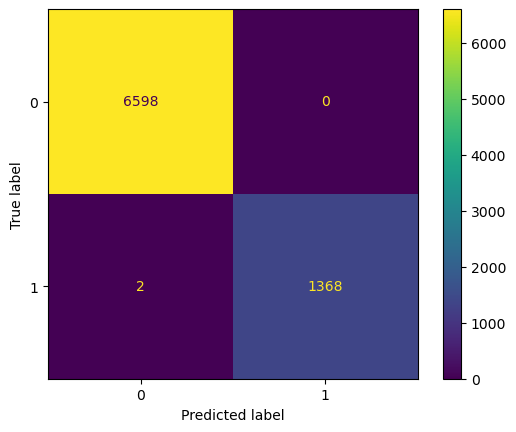

In [135]:
print("\nResults for Train/Test Split 65/35:")
evaluate_model(X_train_65, y_train_65)